# **Proyecto Tercer Corte**
* Sofía Isabella Endara
* Juan David Lasso
* Juan Diego Saldarriaga
* Néstor Andrés Tabares

**Importación de Librerías**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import shapiro, ttest_ind, f_oneway, norm
from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

rcParams['figure.figsize'] = 14, 8.7
LABELS = ["Deserción","Matriculado","Graudado"]

**Importación de Base de Datos**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Visualización de la Base de Datos**

In [41]:
df = pd.read_csv('/content/drive/MyDrive/ANALITICA DE DATOS/proyecto_df.csv',sep=',')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Inflation rate,GDP,Target,Semester_1,Semester_2,Semester_3,Semester_4,Semester_5,Semester_6,Average_Grade
0,1,17,5,171,1,1,122.0,1,19,12,...,1.4,1.74,Dropout,98,88,74,67,80,98,84.166667
1,1,15,1,9254,1,1,160.0,1,1,3,...,-0.3,0.79,Graduate,78,82,70,70,83,95,79.666667
2,1,1,5,9070,1,1,122.0,1,37,37,...,1.4,1.74,Dropout,99,83,62,81,61,83,78.166667
3,1,17,2,9773,1,1,122.0,1,38,37,...,-0.8,-3.12,Graduate,89,97,61,80,92,71,81.666667
4,2,39,1,8014,0,1,100.0,1,37,38,...,-0.3,0.79,Graduate,81,84,86,87,75,74,81.166667


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [43]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [44]:
var_cuan = df[["Admission grade", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
            "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
            "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
            "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]]
var_cuan = var_cuan.astype('float64')

In [45]:
df['Target'] = df['Target'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [46]:
columnas_troll=["Application mode", "Course","Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Application order"]

def transformar_columna(col):
    unique_vals = col.unique()
    mapping = {val: idx + 1 for idx, val in enumerate(unique_vals)}
    return col.map(mapping)

for col in columnas_troll:
    df[col] = transformar_columna(df[col])

# **Análisis Descriptivo**

**Variables Cuantitativas**

In [47]:
var_cuan.describe()

,Admission grade,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,126.978119,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,14.482001,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,117.900000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,126.100000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,134.800000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Las desviaciones estándar muestran una gran variabilidad entre las columnas. Destacan las unidades curriculares del primer semestre acreditadas (2.236507) y evaluadas (4.179106), así como las unidades curriculares del segundo semestre inscritas (2.199591). Los valores mínimos y máximos indican que la calificación de admisión varía de 95 a 190 (desviación estándar de 14.842001), las unidades curriculares del primer semestre acreditadas varían de 0 a 20, y las evaluadas de 0 a 45. En el segundo semestre, las inscritas varían de 0 a 26 y las evaluadas de 0 a 33. La tasa de desempleo fluctúa entre 7.6% y 16.2%, la tasa de inflación entre -0.8% y 3.7%, y el PIB entre -6.6 y 3.51.

El análisis de percentiles muestra que el 25% de los estudiantes tienen una calificación de admisión de 116 o menos. Las unidades curriculares del primer semestre inscritas tienen un percentil del 25% en 5 y del 75% en 8. La tasa de desempleo en el percentil del 25% es de 9.4% y en el 75% es de 13.4%. La tasa de inflación en el percentil del 25% es de 0.4% y en el 75% es de 2.6%. El PIB en el percentil del 25% está en -1.27 y en el 75% en 1.32.

**Mapa de Calor**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


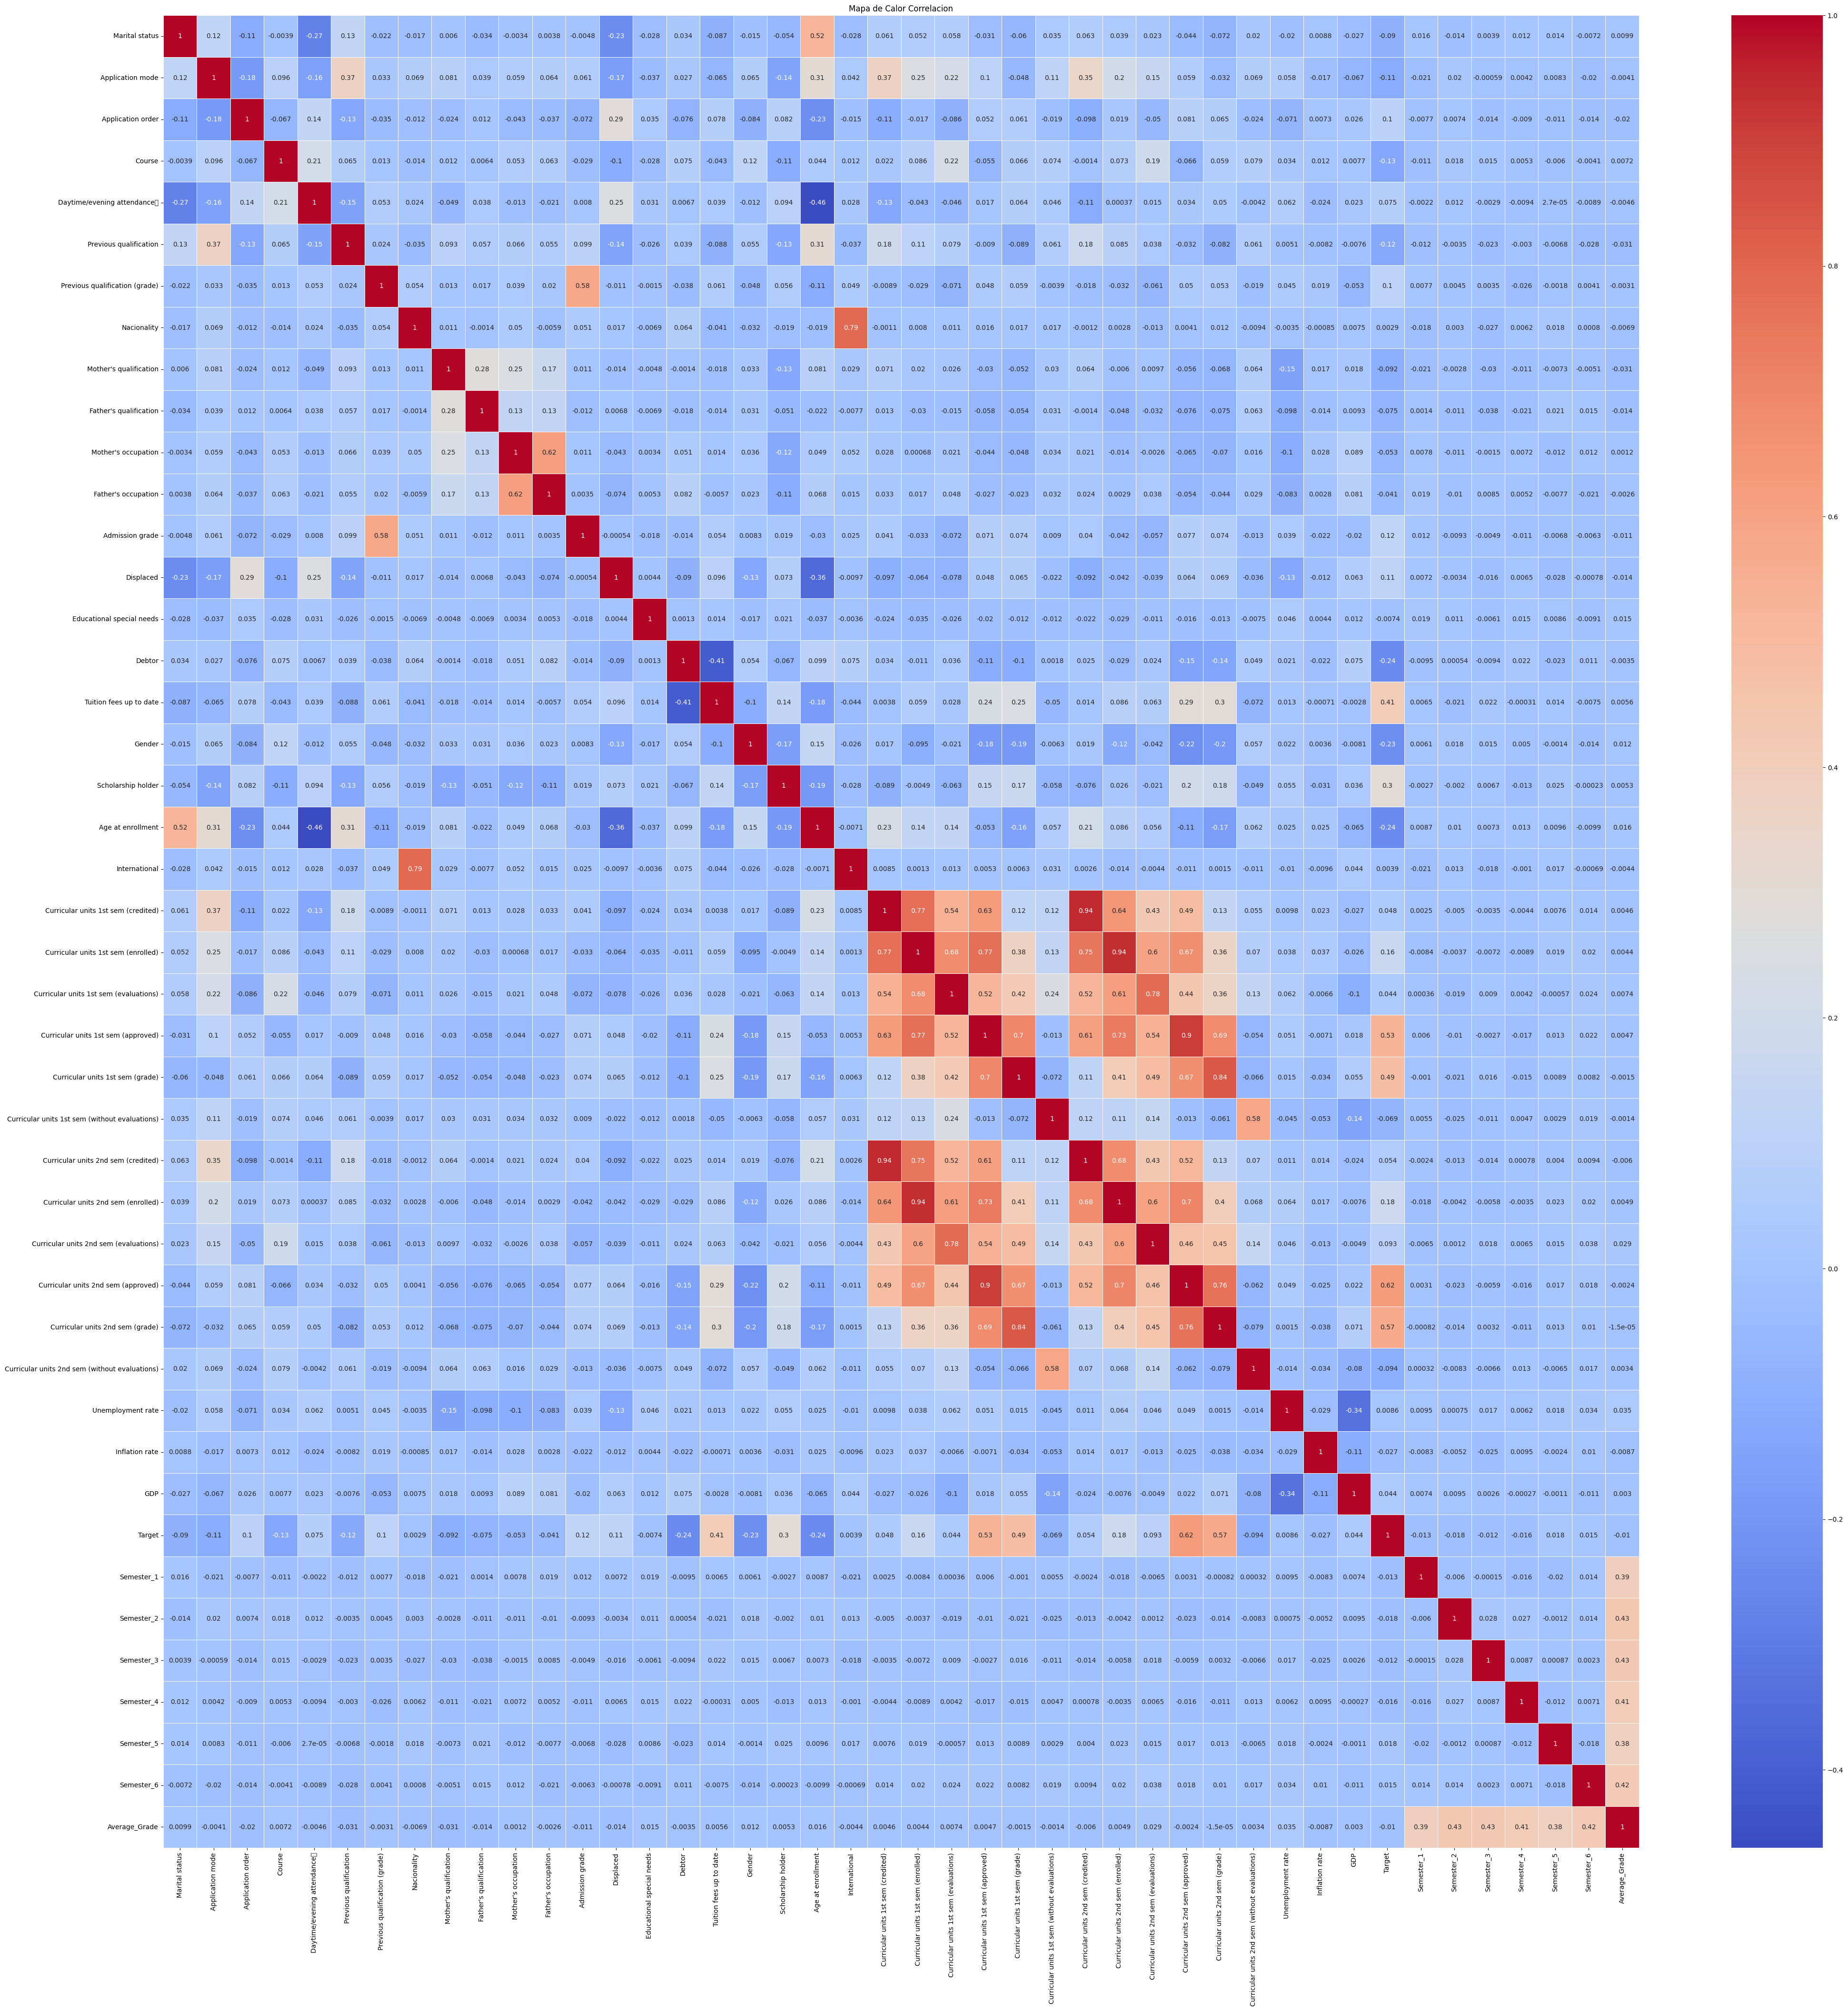

In [48]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor Correlacion')
plt.show()

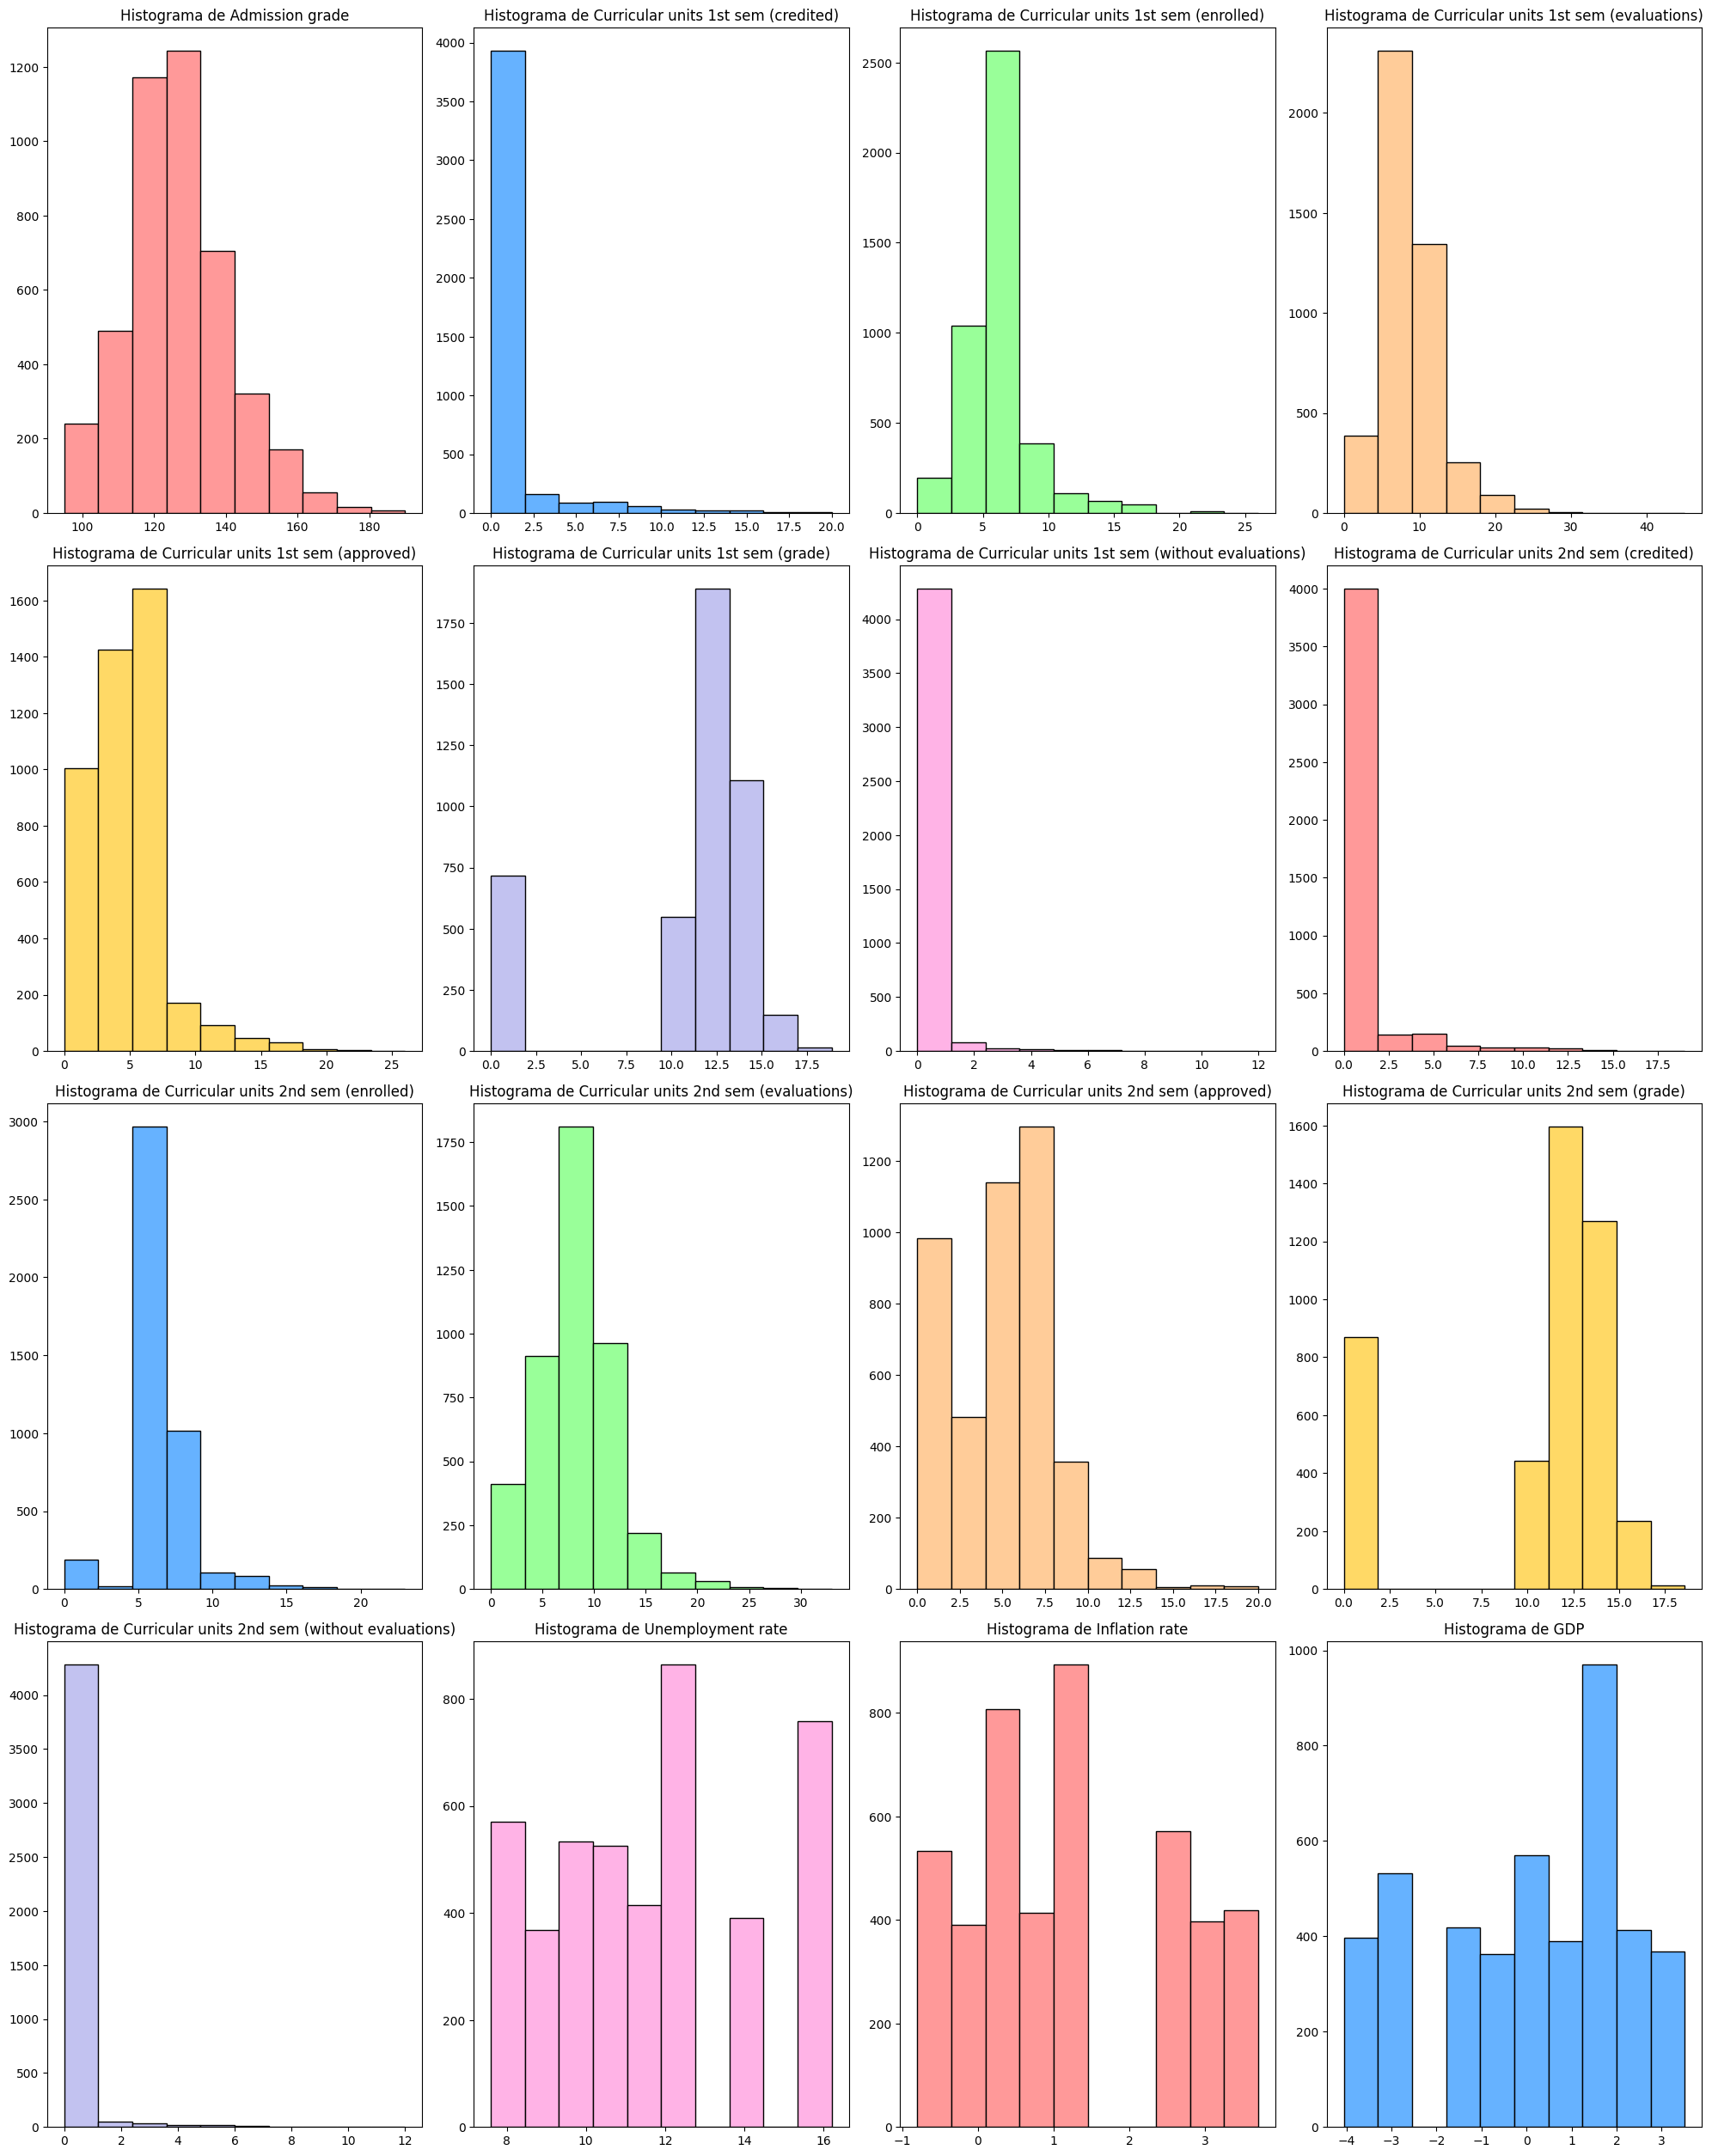

In [49]:
num_columns = len(var_cuan.columns)
num_rows = (num_columns // 2) + (num_columns % 2)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 50))
axes = axes.flatten()

colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#FFD966", "#C2C2F0", "#FFB3E6"]

for i, col in enumerate(var_cuan.columns):
    ax = axes[i]
    ax.hist(var_cuan[col], bins=10, edgecolor="black", color=colors[i % len(colors)])
    ax.set_title(f"Histograma de {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los histogramas revelan una considerable variabilidad en las unidades curriculares inscritas, evaluadas y aprobadas entre los estudiantes a lo largo de los semestres, lo cual es crucial para entender la carga académica y el rendimiento estudiantil. La variabilidad en las tasas de desempleo, inflación y PIB indica fluctuaciones económicas que podrían influir en el desempeño académico y en la situación general de los estudiantes. Este análisis es esencial para diseñar estrategias de apoyo académico y económico para mejorar el rendimiento y la retención de los estudiantes.

**Variables Cualitativas**

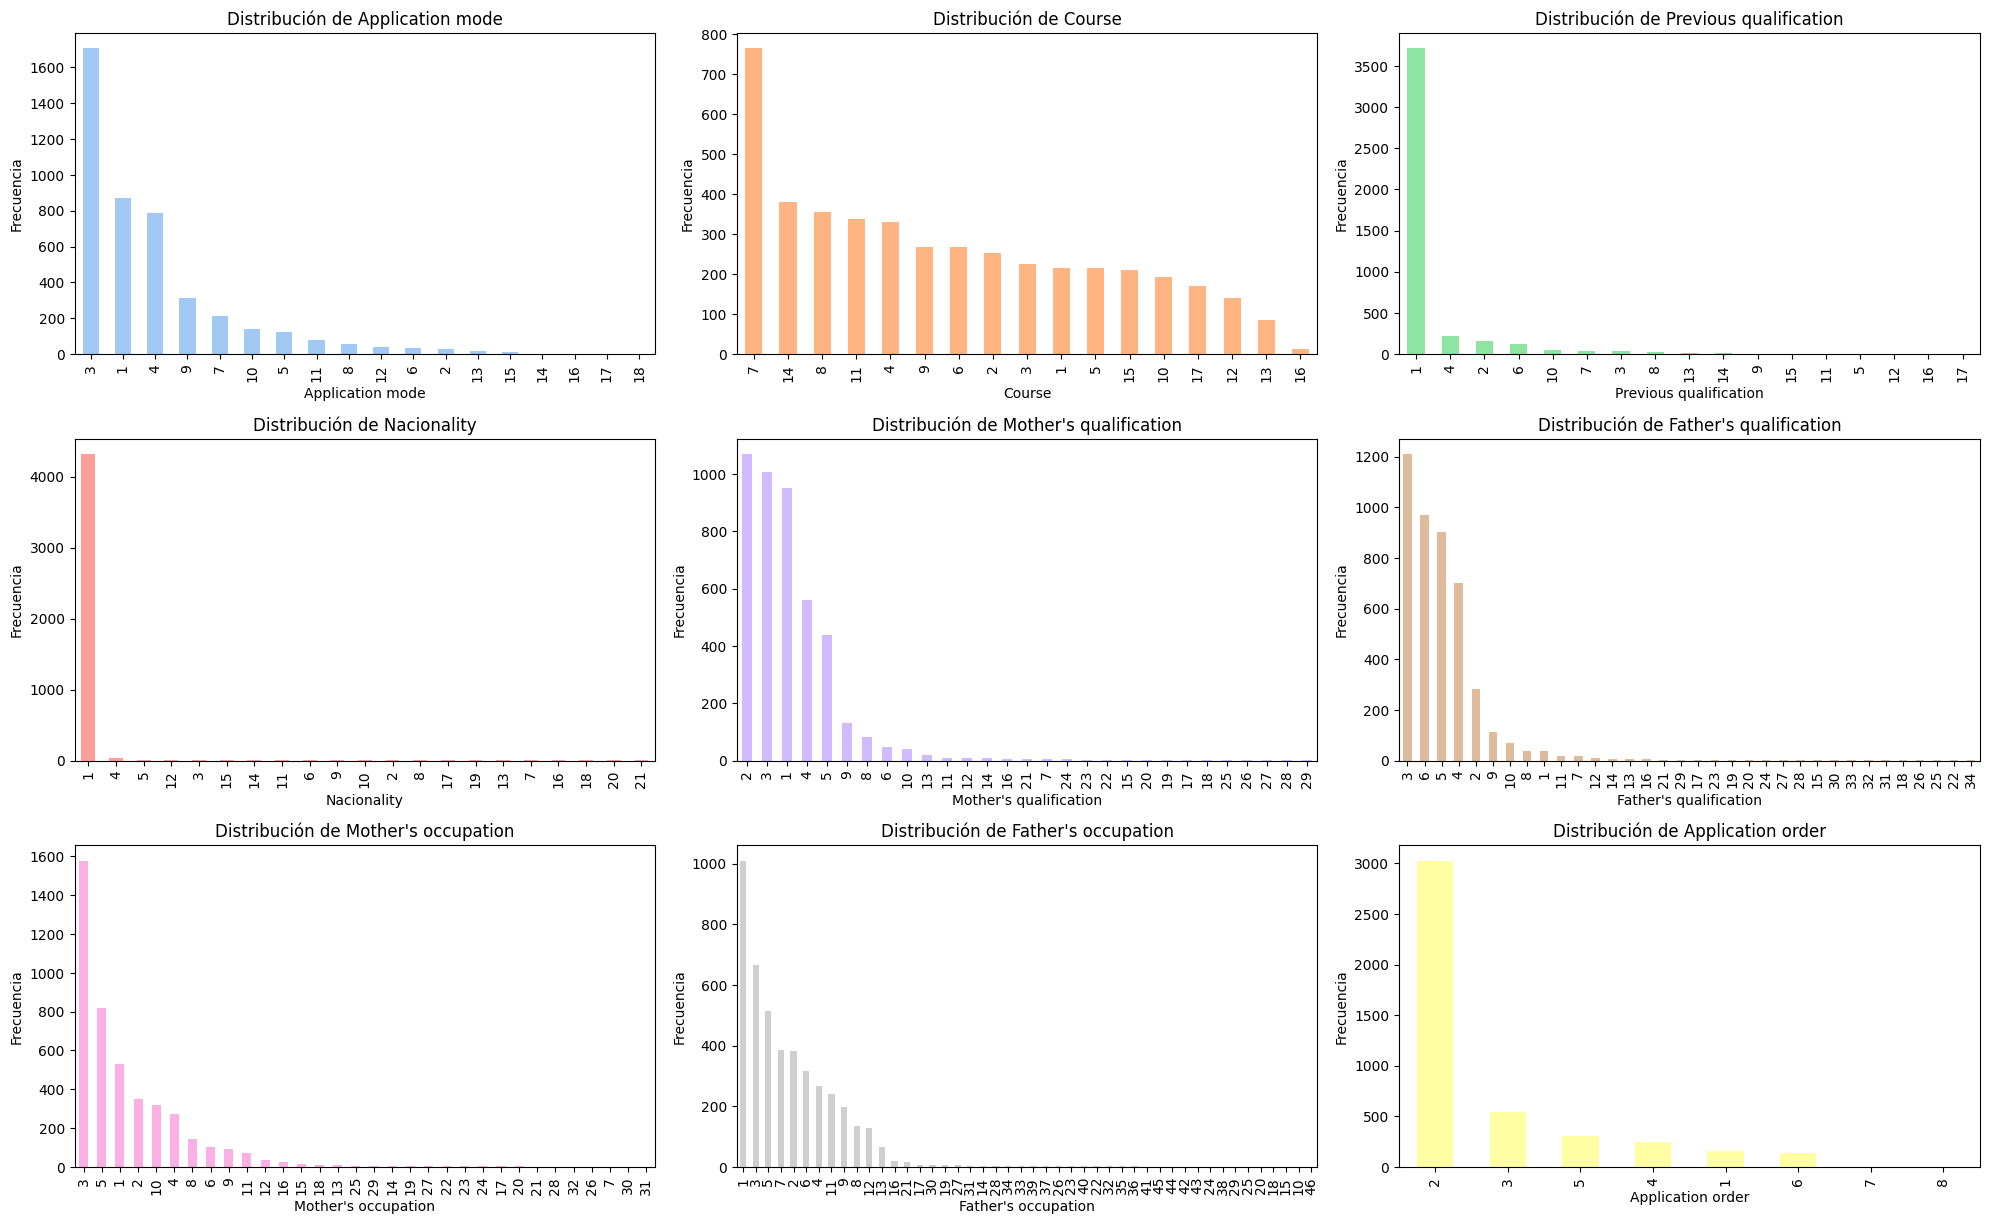


Application mode:
Application mode
3     1708
1      872
4      785
9      312
7      213
10     139
5      124
11      77
8       59
12      38
6       35
2       30
13      16
15      10
14       3
16       1
17       1
18       1
Name: count, dtype: int64

Course:
Course
7     766
14    380
8     355
11    337
4     331
9     268
6     268
2     252
3     226
1     215
5     215
15    210
10    192
17    170
12    141
13     86
16     12
Name: count, dtype: int64

Previous qualification:
Previous qualification
1     3717
4      219
2      162
6      126
10      45
7       40
3       36
8       23
13      16
14      11
9        8
15       7
11       6
5        4
12       2
16       1
17       1
Name: count, dtype: int64

Nacionality:
Nacionality
1     4314
4       38
5       14
12      13
3       13
15       5
14       3
11       3
6        3
9        2
10       2
2        2
8        2
17       2
19       2
13       1
7        1
16       1
18       1
20       1
21       1
Name: coun

In [50]:
num_columns = len(columnas_troll)
num_rows = (num_columns // 2) + (num_columns % 2)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 20))
axes = axes.flatten()

colores_pastel = sns.color_palette("pastel")

for i, col in enumerate(columnas_troll):
    ax = axes[i]
    counts = df[col].value_counts()
    counts.plot(kind='bar', color=colores_pastel[i % len(colores_pastel)], ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for col in columnas_troll:
    print(f"\n{col}:\n{df[col].value_counts()}")

* La mayoría de los estudiantes aplican a través del modo de contingente general de la primera fase.
* Los cursos de Agronomía, Equinocultura y Gestión son los más populares.
* Los estudiantes provienen principalmente de la educación secundaria, con muchos no completando el 12º año.
* La mayoría de los estudiantes son de nacionalidad portuguesa.
* Tanto las madres como los padres tienen niveles educativos similares, principalmente con educación secundaria completa o no completada.
* Las ocupaciones más comunes de los padres y madres están en el ámbito de los servicios personales y la agricultura.
* La mayoría de los estudiantes logran inscribirse en su primera opción de curso.

In [51]:
for columna in var_cuan.columns:
    stat, p_value = shapiro(var_cuan[columna])
    print(f'Variable: {columna}')
    print(f'Estadístico de prueba: {stat}')
    print(f'Valor p: {p_value}')
    alpha = 0.05

    if p_value > alpha:
        print('No podemos rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.')
    else:
        print('Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.')
        print('-' * 100)

Variable: Admission grade
Estadístico de prueba: 0.9804928302764893
Valor p: 3.2225109973241272e-24
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
----------------------------------------------------------------------------------------------------
Variable: Curricular units 1st sem (credited)
Estadístico de prueba: 0.34367233514785767
Valor p: 0.0
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
----------------------------------------------------------------------------------------------------
Variable: Curricular units 1st sem (enrolled)
Estadístico de prueba: 0.7300187349319458
Valor p: 0.0
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
----------------------------------------------------------------------------------------------------
Variable: Curricular units 1st sem (evaluations)
Estadístico de prueba: 0.9027658104896545
Valor p: 0.0
Rechazamos la hipótesis nula. Los datos no siguen una distribució

**Gender vs. Admission Grade**

In [52]:
male_admission_grades = df[df['Gender'] == 1]['Admission grade']
female_admission_grades = df[df['Gender'] == 0]['Admission grade']
t_stat_gender, p_value_gender = ttest_ind(male_admission_grades, female_admission_grades)
alpha=0.05

print(f'Gender vs. Admission Grade: t-statistic = {t_stat_gender}, p-value = {p_value_gender}')

if p_value_gender < alpha:
    print("Se rechaza la hipótesis nula, las mujeres tienen el mismo nivel de grado de admisión que los hombres.")
else:
    print("No hay suficiente evidencia para afirmar que las mujeres tienen el mismo nivel de grado de admisión que los hombres.")

Gender vs. Admission Grade: t-statistic = 0.5529373750543329, p-value = 0.5803342439414844
No hay suficiente evidencia para afirmar que las mujeres tienen el mismo nivel de grado de admisión que los hombres.


**Daytime/Evening Attendance vs. Admission Grade**

In [53]:
daytime_admission_grades = df[df["Daytime/evening attendance\t"] == 1]['Admission grade']
evening_admission_grades = df[df["Daytime/evening attendance\t"] == 0]['Admission grade']
t_stat_attendance, p_value_attendance = ttest_ind(daytime_admission_grades, evening_admission_grades)

print(f'Daytime/Evening Attendance vs. Admission Grade: t-statistic = {t_stat_attendance}, p-value = {p_value_attendance}')

if p_value_attendance < alpha:
    print("Se rechaza la hipótesis nula, los estudiantes de asistencia diurna tienen el mismo nivel de grado de admisión que los de asistencia nocturna.")
else:
    print("No hay suficiente evidencia para afirmar que los estudiantes de asistencia diurna tienen el mismo nivel de grado de admisión que los de asistencia nocturna.")

Daytime/Evening Attendance vs. Admission Grade: t-statistic = 0.530024916342784, p-value = 0.5961212666784523
No hay suficiente evidencia para afirmar que los estudiantes de asistencia diurna tienen el mismo nivel de grado de admisión que los de asistencia nocturna.


**Scholarship Holder vs. Admission Grade**

In [54]:
scholarship_admission_grades = df[df['Scholarship holder'] == 1]['Admission grade']
non_scholarship_admission_grades = df[df['Scholarship holder'] == 0]['Admission grade']
t_stat_scholarship, p_value_scholarship = ttest_ind(scholarship_admission_grades, non_scholarship_admission_grades)

print(f'Scholarship Holder vs. Admission Grade: t-statistic = {t_stat_scholarship}, p-value = {p_value_scholarship}')

if p_value_scholarship < alpha:
    print("Se rechaza la hipótesis nula, los becarios tienen el mismo nivel de grado de admisión que los no becarios.")
else:
    print("No hay suficiente evidencia para afirmar que los becarios tienen el mismo nivel de grado de admisión que los no becarios.")

Scholarship Holder vs. Admission Grade: t-statistic = 1.2558014302979803, p-value = 0.20925432086641343
No hay suficiente evidencia para afirmar que los becarios tienen el mismo nivel de grado de admisión que los no becarios.


**Marital Status vs. Previous Qualification Grade**

In [55]:
marital_statuses = df['Marital status'].unique()
marital_groups = [df[df['Marital status'] == status]['Previous qualification (grade)'] for status in marital_statuses]
t_stat_marital, p_value_marital = f_oneway(*marital_groups)

print(f'Marital Status vs. Previous Qualification Grade: F-statistic = {t_stat_marital}, p-value = {p_value_marital}')

if p_value_marital < alpha:
    print("Se rechaza la hipótesis nula, el estado civil no afecta el nivel de calificación previa.")
else:
    print("No hay suficiente evidencia para afirmar que el estado civil afecta el nivel de calificación previa.")

Marital Status vs. Previous Qualification Grade: F-statistic = 2.5329940443616277, p-value = 0.02687673432104063
Se rechaza la hipótesis nula, el estado civil no afecta el nivel de calificación previa.


**Intervalos de Confianza**

In [56]:
def int_con(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = sem * norm.ppf((1 + confidence) / 2)
    return mean, mean - margin_of_error, mean + margin_of_error

Gender vs. Admission Grade

In [57]:
male_mean, male_ci_lower, male_ci_upper = int_con(male_admission_grades)
female_mean, female_ci_lower, female_ci_upper = int_con(female_admission_grades)
print(f"IC para el grado de admisión (hombres): {male_mean:.2f} ({male_ci_lower:.2f}, {male_ci_upper:.2f})")
print(f"IC para el grado de admisión (mujeres): {female_mean:.2f} ({female_ci_lower:.2f}, {female_ci_upper:.2f})")

IC para el grado de admisión (hombres): 127.14 (126.39, 127.89)
IC para el grado de admisión (mujeres): 126.89 (126.37, 127.41)


In [58]:
day_mean, day_ci_lower, day_ci_upper = int_con(daytime_admission_grades)
eve_mean, eve_ci_lower, eve_ci_upper = int_con(evening_admission_grades)
print(f"IC para el grado de admisión (diurno): {day_mean:.2f} ({day_ci_lower:.2f}, {day_ci_upper:.2f})")
print(f"IC para el grado de admisión (nocturno): {eve_mean:.2f} ({eve_ci_lower:.2f}, {eve_ci_upper:.2f})")

IC para el grado de admisión (diurno): 127.02 (126.58, 127.46)
IC para el grado de admisión (nocturno): 126.65 (125.15, 128.14)


In [59]:
scholar_mean, scholar_ci_lower, scholar_ci_upper = int_con(scholarship_admission_grades)
non_scholar_mean, non_scholar_ci_lower, non_scholar_ci_upper = int_con(non_scholarship_admission_grades)
print(f"IC para el grado de admisión (becarios): {scholar_mean:.2f} ({scholar_ci_lower:.2f}, {scholar_ci_upper:.2f})")
print(f"IC para el grado de admisión (no becarios): {non_scholar_mean:.2f} ({non_scholar_ci_lower:.2f}, {non_scholar_ci_upper:.2f})")

IC para el grado de admisión (becarios): 127.45 (126.67, 128.24)
IC para el grado de admisión (no becarios): 126.82 (126.32, 127.33)


In [60]:
for status in marital_statuses:
    group = df[df['Marital status'] == status]['Previous qualification (grade)']
    mean, ci_lower, ci_upper = int_con(group)
    print(f"IC para el estado civil {status}: {mean:.2f} ({ci_lower:.2f}, {ci_upper:.2f})")

IC para el estado civil 1: 132.81 (132.41, 133.22)
IC para el estado civil 2: 130.55 (129.03, 132.06)
IC para el estado civil 4: 132.04 (129.46, 134.62)
IC para el estado civil 3: 140.75 (120.14, 161.36)
IC para el estado civil 5: 134.35 (127.25, 141.45)
IC para el estado civil 6: 129.57 (123.77, 135.36)


# Procesamiento de Datos

In [61]:
columnas_troll=["Application mode", "Course","Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Application order"]

for column in columnas_troll :
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")
    print("-" * 100)


Valores únicos en la columna 'Application mode': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
----------------------------------------------------------------------------------------------------
Valores únicos en la columna 'Course': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
----------------------------------------------------------------------------------------------------
Valores únicos en la columna 'Previous qualification': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
----------------------------------------------------------------------------------------------------
Valores únicos en la columna 'Nacionality': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
----------------------------------------------------------------------------------------------------
Valores únicos en la columna 'Mother's qualification': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
-------------------------------------

In [62]:
columnas_troll=["Application mode", "Course","Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Application order"]

def transformar_columna(col):
    unique_vals = col.unique()
    mapping = {val: idx + 1 for idx, val in enumerate(unique_vals)}
    return col.map(mapping)

for col in columnas_troll:
    df[col] = transformar_columna(df[col])

In [63]:
df["Target"].unique()
df["Target"] = df["Target"].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

df["Target"].unique()

array([0, 2, 1])

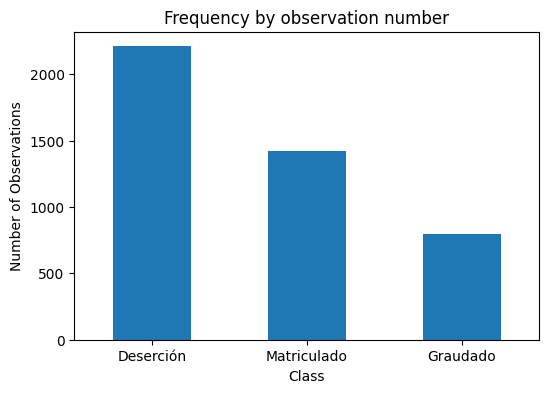

In [64]:
plt.figure(figsize=(6, 4))
count_classes = pd.value_counts(df['Target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(3), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

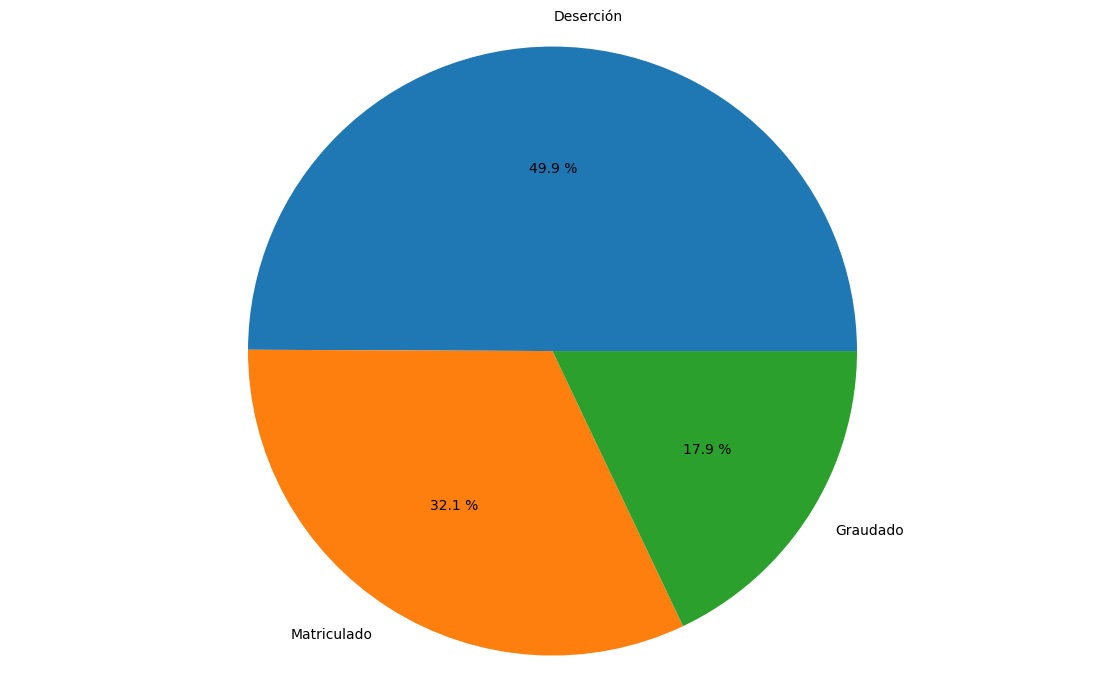

In [65]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(df['Target'], sort = True)

plt.pie(count_classes, labels= LABELS, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [66]:
print(count_classes)

Target
2    2209
0    1421
1     794
Name: count, dtype: int64


# Funciones para graficas y matriz de confusión

In [67]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [68]:
from sklearn.model_selection import cross_val_score
def valcruz(modelo, X_train,y_train):
  scores = cross_val_score(estimator=modelo,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
  return np.mean(scores)

In [69]:
from sklearn.metrics import precision_score , accuracy_score ,recall_score,f1_score
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=UserWarning)

def LogisticModelBalanced(i,X_train,y_train):

    best_recall = 0
    best_model = None
    penalty = ["l1","l2"]
    for c in range(-5,5):
        for penal in penalty:
          if i == 1:
              clf = LogisticRegression(C=10**c, penalty=penal, random_state=1, solver="saga", class_weight="balanced", max_iter=10000)
              modelo = clf.fit(X_train, y_train)
          else:
              clf = LogisticRegression(C=10**c, penalty=penal, random_state=1, solver="saga", max_iter=100)
              pipe = Pipeline([('pca', PCA(n_components=X_train.shape[1])), ('clf', clf)])
              modelo = pipe.fit(X_train, y_train)


          y_pred = modelo.predict(X_test)
          conf_matrix = confusion_matrix(y_test, y_pred)
          TP = conf_matrix[0, 0]
          FN = np.sum(conf_matrix[0, :]) - TP
          recall = TP / (TP + FN)
          if recall > best_recall:
                best_recall = recall
                best_model = clf

    print(best_recall)
    pred_y = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, pred_y)

    precision = precision_score(y_test, pred_y,  average= "weighted")

    recall = best_recall

    f1 = f1_score(y_test, pred_y, average= "weighted")
    valicruz = valcruz(best_model,X_train,y_train)


    return best_model, accuracy, precision, recall, f1, valicruz

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Target']
X = df.drop('Target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


0.7850467289719626


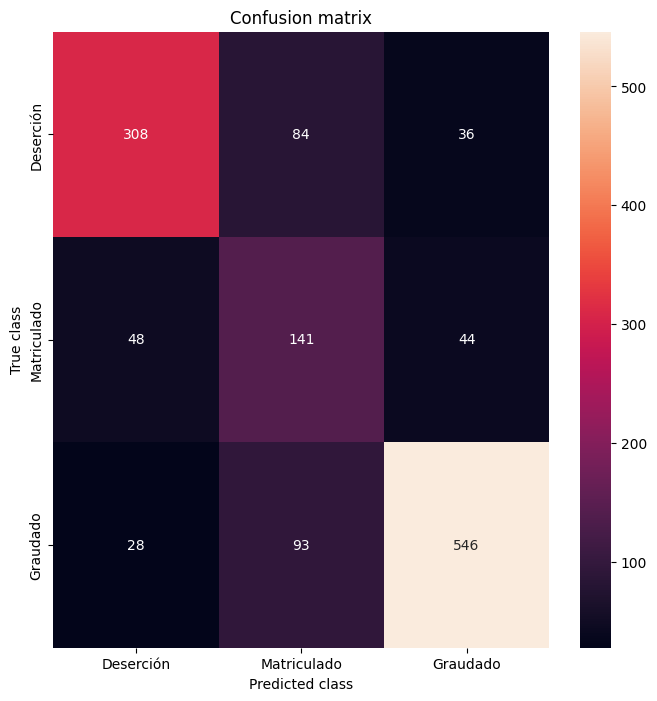

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       428
           1       0.44      0.61      0.51       233
           2       0.87      0.82      0.84       667

    accuracy                           0.75      1328
   macro avg       0.71      0.71      0.70      1328
weighted avg       0.77      0.75      0.76      1328



In [71]:
modelo,accuracy,precision, recall, f1, valicruz = LogisticModelBalanced(1,X_train_std,y_train)
y_pred = modelo.predict(X_test_std)
mostrar_resultados(y_test, y_pred)

# Funciones de modelo


In [72]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):

        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote must be 'probability' or 'classlabel'"
                             f"; got (vote={self.vote})")

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f'Number of classifiers and weights must be equal'
                             f'; got {len(self.weights)} weights,'
                             f' {len(self.classifiers)} classifiers')

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):

        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):

        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):

        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=UserWarning)

def SVM(X_train, y_train):
    best_recall = 0
    best_model = None
    for c in range(-2, 2):
        for gamma in range(-2, 2):
            svm = SVC(kernel='rbf', random_state=1, gamma=10**gamma, C=10**c)
            pipe = Pipeline([('pca', PCA(n_components=2)), ('svm', svm)])
            modelo = pipe.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            conf_matrix = confusion_matrix(y_test, y_pred)
            TP = conf_matrix[0, 0]
            FN = np.sum(conf_matrix[0, :]) - TP
            recall = TP / (TP + FN)
            if recall > best_recall:
                best_recall = recall
                best_model = pipe

    pred_y = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average="weighted")
    recall = best_recall
    f1 = f1_score(y_test, pred_y, average="weighted")
    valicruz = valcruz(best_model,X_train,y_train)


    return best_model, accuracy, precision, recall, f1, valicruz



In [74]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=UserWarning)


def RandomForestModelBalanced(X_train, y_train):
    best_recall = 0
    forest = RandomForestClassifier(criterion='gini', n_estimators=1, random_state=1, n_jobs=2)
    best_model = Pipeline([('pca', PCA(n_components=2)), ('forest', forest)])
    best_model.fit(X_train, y_train)

    for n in range(2, 21):
        forest = RandomForestClassifier(criterion='gini', n_estimators=n, random_state=1, n_jobs=2)
        pipe = Pipeline([('pca', PCA(n_components=2)), ('forest', forest)])
        modelo = pipe.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP = conf_matrix[0, 0]
        FN = np.sum(conf_matrix[0, :]) - TP
        recall = TP / (TP + FN)
        if recall > best_recall:
            best_recall = recall
            best_model = pipe


    pred_y = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average="weighted")
    recall = best_recall
    f1 = f1_score(y_test, pred_y, average="weighted")
    valicruz = valcruz(best_model,X_train,y_train)

    return best_model, accuracy, precision, recall, f1, valicruz

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def NaiveBayesModelBalanced(X_train, y_train):
    best_recall = 0

    gnb = GaussianNB()
    best_model = Pipeline([('pca', PCA(n_components=2)), ('gnb', gnb)])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[0, 0]
    FN = np.sum(conf_matrix[0, :]) - TP
    recall = TP / (TP + FN)

    print(best_recall)
    pred_y = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average="weighted")
    recall = recall
    f1 = f1_score(y_test, pred_y, average="weighted")
    valicruz = valcruz(best_model,X_train,y_train)

    return best_model, accuracy, precision, recall, f1, valicruz


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def KNNModelBalanced(X_train, y_train):
    best_recall = 0

    best_model = Pipeline([('pca', PCA(n_components=2)), ('knn', KNeighborsClassifier())]).fit(X_train, y_train)
    penal = [1,2]
    for n in range(1, 11):
      for p in penal:
        knn = KNeighborsClassifier(n_neighbors=n, p=p, metric='minkowski')
        pipe = Pipeline([('pca', PCA(n_components=2)), ('knn', knn)])
        modelo = pipe.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        TP = conf_matrix[0, 0]
        FN = np.sum(conf_matrix[0, :]) - TP
        recall = TP / (TP + FN)
        if recall > best_recall:
            best_recall = recall
            best_model = pipe

    print(best_recall)
    pred_y = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average="weighted")
    recall = best_recall
    f1 = f1_score(y_test, pred_y, average="weighted")
    valicruz = valcruz(best_model,X_train,y_train)

    return best_model, accuracy, precision, recall, f1, valicruz

 # funciones para balancear los datos

In [77]:
def SMOTE():
  os_us = SMOTETomek(sampling_strategy="auto")
  X_Scaled_res, y_train_res = os_us.fit_resample(X_train_std, y_train)


  return X_Scaled_res , y_train_res

In [78]:
from imblearn.under_sampling import NearMiss
import imblearn
print(imblearn.__version__)
from imblearn.under_sampling import NearMiss

def Near():
  us = NearMiss(sampling_strategy= "auto", n_neighbors= 3 , version=2)
  X_train_res, y_train_res = us.fit_resample(X_train_std, y_train)

  return X_train_res, y_train_res


0.10.1


In [79]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

from sklearn.metrics import precision_score, recall_score

def Random():
  os = RandomOverSampler(sampling_strategy= "auto" )
  X_train_res, y_train_res = os.fit_resample(X_train, y_train)

  return X_train_res, y_train_res

# Modelos

## Regresion Logistica

0.9088785046728972
0.009345794392523364
0.7172897196261683


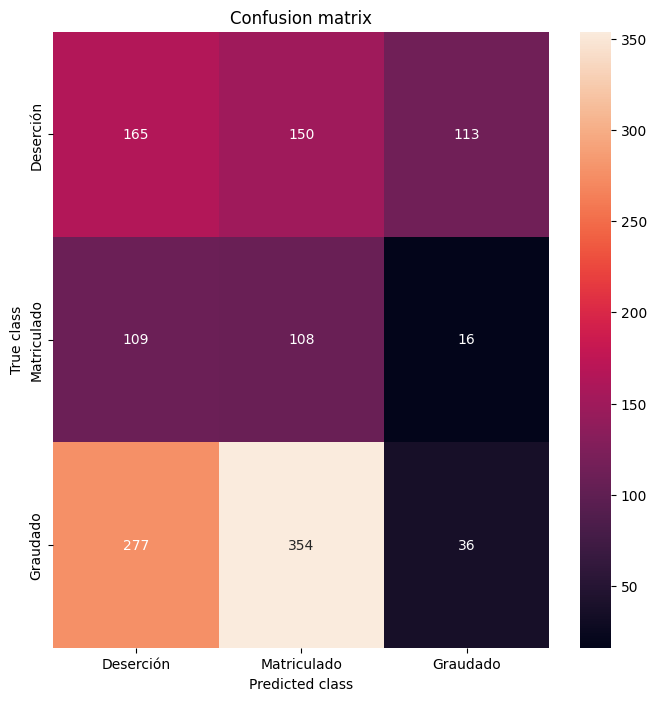

              precision    recall  f1-score   support

           0       0.30      0.39      0.34       428
           1       0.18      0.46      0.26       233
           2       0.22      0.05      0.09       667

    accuracy                           0.23      1328
   macro avg       0.23      0.30      0.23      1328
weighted avg       0.24      0.23      0.20      1328



In [80]:
defbal = [SMOTE(), Near(), Random()]
m_valcruz = 0
for b in defbal:
  X_train_res, y_train_res = b
  model, accuracy, precision, recall, f1, valicruz = LogisticModelBalanced(2,X_train_res,y_train_res)
  if valicruz> m_valcruz:
    modelo1 = model
    accuracy1 = accuracy
    precision1 = precision
    recall1 = recall
    f1_1 = f1
    valicruz1= valicruz

y_pred = modelo1.predict(X_test_std)
mostrar_resultados(y_test, y_pred)

## SVM

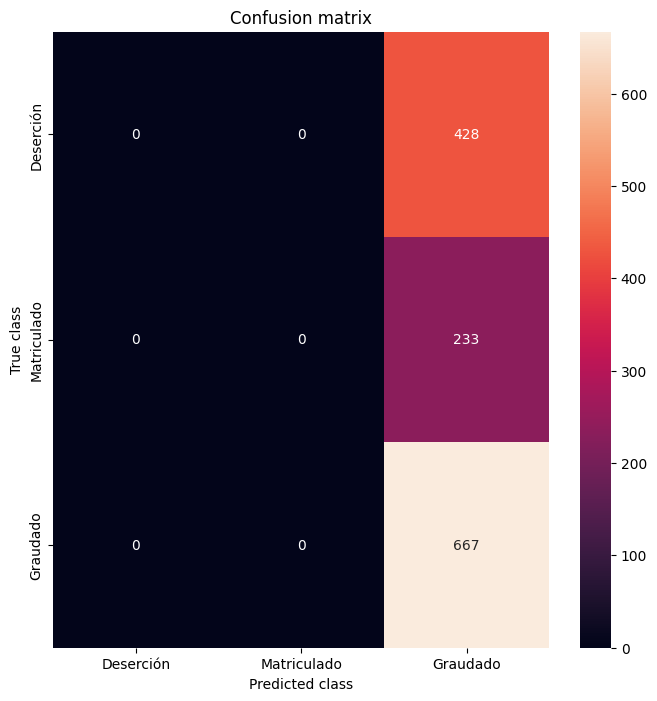

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       428
           1       0.00      0.00      0.00       233
           2       0.50      1.00      0.67       667

    accuracy                           0.50      1328
   macro avg       0.17      0.33      0.22      1328
weighted avg       0.25      0.50      0.34      1328



In [81]:
defbal = [SMOTE(), Near(), Random()]
m_valcruz = 0
for b in defbal:
  X_train_res, y_train_res = b
  model, accuracy, precision, recall, f1, valicruz = SVM(X_train_res, y_train_res)
  if valicruz> m_valcruz:
    modelo2 = model
    accuracy2 = accuracy
    precision2 = precision
    recall2 = recall
    f1_2 = f1
    valicruz2= valicruz

y_pred = modelo2.predict(X_test_std)
mostrar_resultados(y_test, y_pred)

## Random Forest

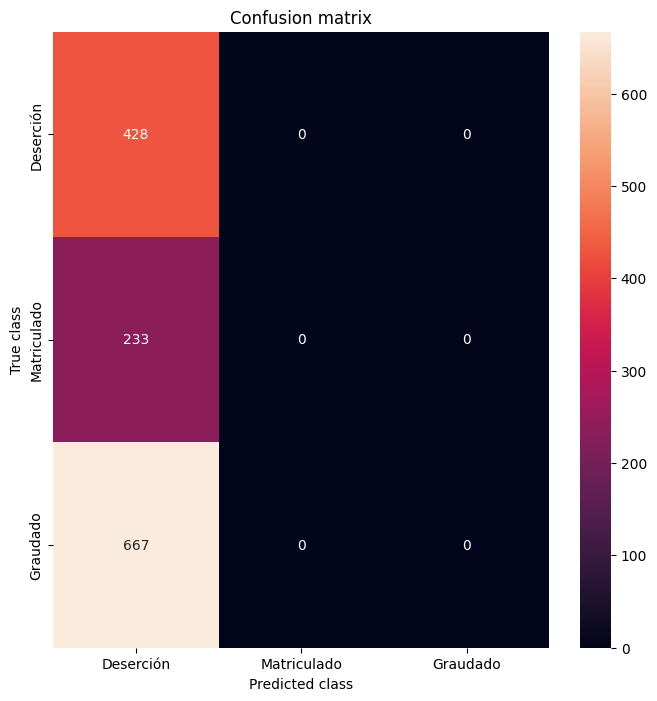

              precision    recall  f1-score   support

           0       0.32      1.00      0.49       428
           1       0.00      0.00      0.00       233
           2       0.00      0.00      0.00       667

    accuracy                           0.32      1328
   macro avg       0.11      0.33      0.16      1328
weighted avg       0.10      0.32      0.16      1328

0.5560747663551402


In [82]:
defbal = [SMOTE(), Near(), Random()]
m_valcruz = 0
for b in defbal:
  X_train_res, y_train_res = b
  model, accuracy, precision, recall, f1, valicruz = RandomForestModelBalanced(X_train_res, y_train_res)
  if valicruz> m_valcruz:
    modelo3 = model
    accuracy3 = accuracy
    precision3 = precision
    recall3 = recall
    f1_3 = f1
    valicruz3= valicruz

y_pred = modelo3.predict(X_test_std)
mostrar_resultados(y_test, y_pred)
print(recall3)

## Naive Bayes

0
0
0


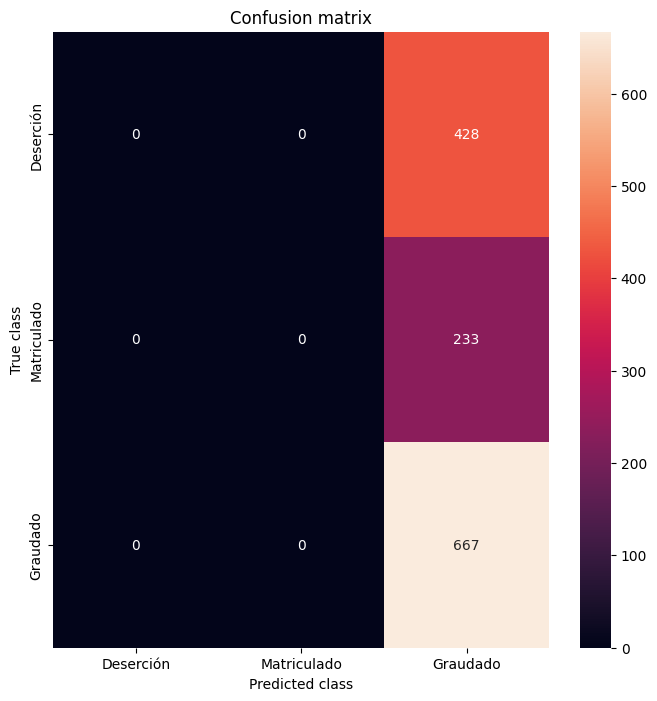

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       428
           1       0.00      0.00      0.00       233
           2       0.50      1.00      0.67       667

    accuracy                           0.50      1328
   macro avg       0.17      0.33      0.22      1328
weighted avg       0.25      0.50      0.34      1328

0.32242990654205606


In [83]:
defbal = [SMOTE(), Near(), Random()]
m_valcruz = 0
for b in defbal:
  X_train_res, y_train_res = b
  model, accuracy, precision, recall, f1, valicruz = NaiveBayesModelBalanced(X_train_res, y_train_res)
  if valicruz> m_valcruz:
    modelo4 = model
    accuracy4 = accuracy
    precision4 = precision
    recall4 = recall
    f1_4 = f1
    valicruz4= valicruz


y_pred = modelo4.predict(X_test_std)
mostrar_resultados(y_test, y_pred)

print(recall4)

## KNN

0.3177570093457944
0
0.47897196261682246


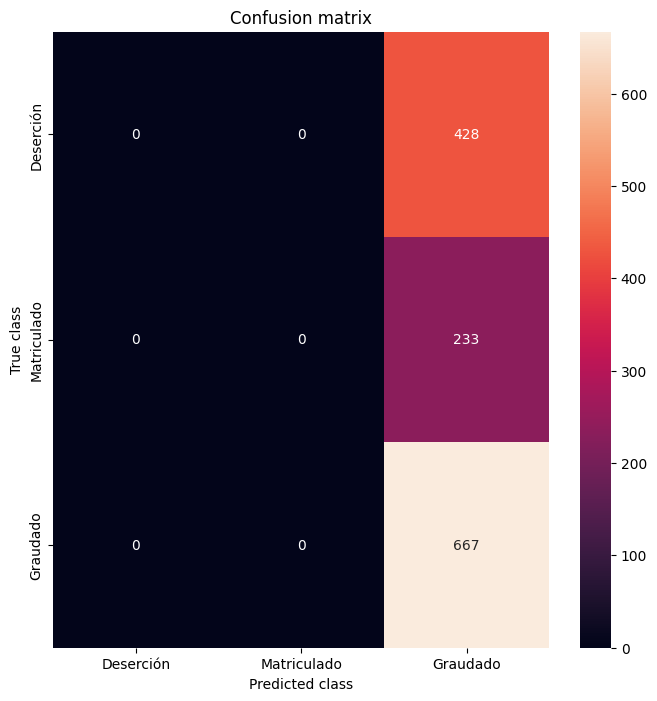

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       428
           1       0.00      0.00      0.00       233
           2       0.50      1.00      0.67       667

    accuracy                           0.50      1328
   macro avg       0.17      0.33      0.22      1328
weighted avg       0.25      0.50      0.34      1328

0.47897196261682246


In [84]:
defbal = [SMOTE(), Near(), Random()]
m_valcruz = 0
for b in defbal:
  X_train_res, y_train_res = b
  model, accuracy, precision, recall, f1, valicruz = KNNModelBalanced(X_train_res, y_train_res)
  if valicruz> m_valcruz:
    modelo5 = model

    recall5 = recall



y_pred = modelo5.predict(X_test_std)
accuracy5 = accuracy_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred, average="weighted")
f1_5= f1_score(y_test, y_pred, average="weighted")
valicruz5 = valcruz(modelo5,X_train,y_train)
mostrar_resultados(y_test, y_pred)

print(recall5)

## LDA

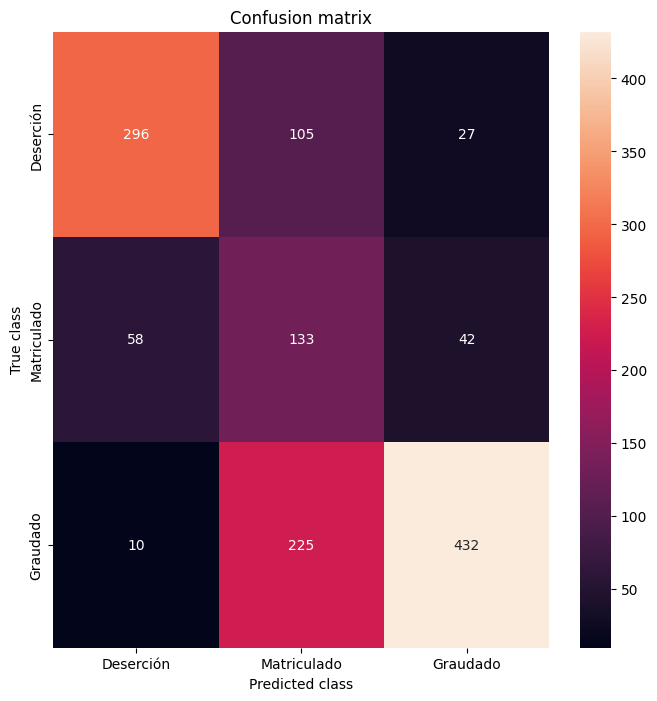

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       428
           1       0.29      0.57      0.38       233
           2       0.86      0.65      0.74       667

    accuracy                           0.65      1328
   macro avg       0.65      0.64      0.62      1328
weighted avg       0.75      0.65      0.68      1328



In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
defbal = [SMOTE(), Near(), Random()]

recall6= 0

for b in defbal:
  X_train_res, y_train_res = b
  modelo = LDA(n_components=2)

  modelo.fit(X_train_res, y_train_res)
  y_pred = modelo.predict(X_test_std)

  conf_matrix = confusion_matrix(y_test, y_pred)
  TP = conf_matrix[0, 0]
  FN = np.sum(conf_matrix[0, :]) - TP
  recall = TP / (TP + FN)

  if recall > recall6:
    modelo6 = modelo
    recall6 = recall


y_pred = modelo6.predict(X_test_std)
accuracy6 = accuracy_score(y_test, y_pred)
precision6 = precision_score(y_test, y_pred, average="weighted")
f1_6 = f1_score(y_test, y_pred, average="weighted")
valicruz6 = valcruz(modelo6,X_train,y_train)


mostrar_resultados(y_test, y_pred)

# Bagging

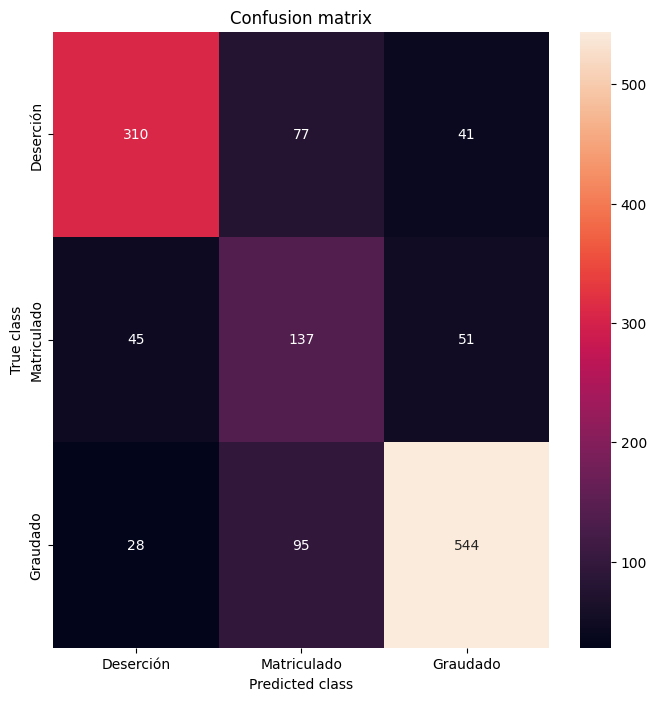

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       428
           1       0.44      0.59      0.51       233
           2       0.86      0.82      0.83       667

    accuracy                           0.75      1328
   macro avg       0.70      0.71      0.70      1328
weighted avg       0.77      0.75      0.75      1328



In [86]:
from imblearn.ensemble import BalancedBaggingClassifier

modelos = [ LogisticRegression(),SVC(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),LDA(n_components=2)]

recall8 = 0

for mol in modelos:
  bbc = BalancedBaggingClassifier(estimator=mol,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

  modelo = bbc.fit(X_train_std, y_train)
  y_pred = modelo.predict(X_test_std)
  conf_matrix = confusion_matrix(y_test, y_pred)
  TP = conf_matrix[0, 0]
  FN = np.sum(conf_matrix[0, :]) - TP
  recall = TP / (TP + FN)
  if recall > recall8:
    recall8 = recall
    modelo8 = bbc

y_pred = modelo8.predict(X_test_std)
accuracy8 = accuracy_score(y_test, y_pred)
precision8 = precision_score(y_test, y_pred, average="weighted")
f1_8= f1_score(y_test, y_pred, average="weighted")
valicruz8 = valcruz(modelo8,X_train,y_train)


mostrar_resultados(y_test, y_pred)

# AdaBoost

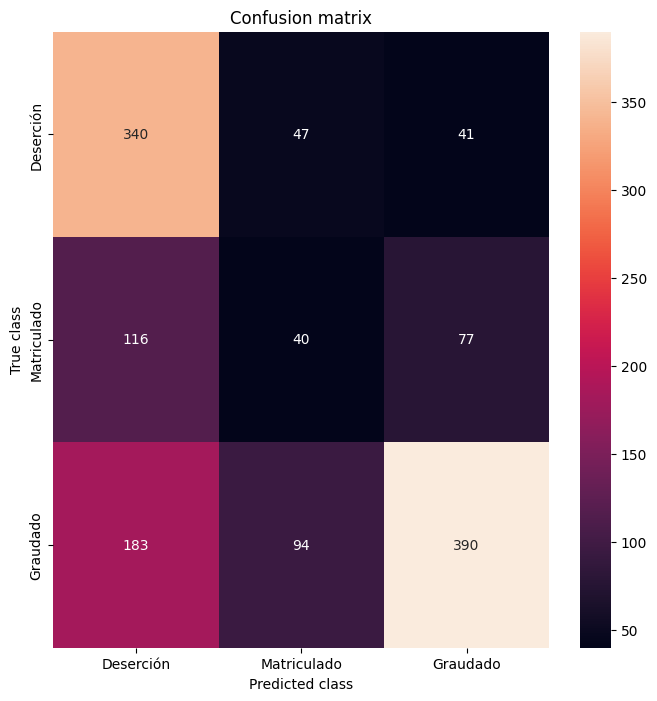

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       428
           1       0.22      0.17      0.19       233
           2       0.77      0.58      0.66       667

    accuracy                           0.58      1328
   macro avg       0.51      0.52      0.50      1328
weighted avg       0.60      0.58      0.57      1328



In [87]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier

defbal = [SMOTETomek(sampling_strategy="auto"), NearMiss(sampling_strategy= "auto", n_neighbors= 3 , version=2) , RandomOverSampler(sampling_strategy= "auto" ) ]
modelos = [LogisticRegression(), RandomForestClassifier(), GaussianNB()]

recall9 = 0

for des in defbal:
  for mol in modelos:

    ada_clf = AdaBoostClassifier(estimator= mol, n_estimators=100, random_state=0)

    pipeline = ImbPipeline([('UnderSampler', des), ('AdaBoost', ada_clf)])

    X_train_res, y_train_res = des.fit_resample(X_train_std, y_train)
    modelo = pipeline.fit(X_train_res, y_train_res)

    y_pred = modelo.predict(X_test_std)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[0, 0]
    FN = np.sum(conf_matrix[0, :]) - TP
    recall = TP / (TP + FN)

    if recall > recall9:
      recall9 = recall
      modelo9 = pipeline

y_pred = modelo9.predict(X_test_std)

y_pred = modelo9.predict(X_test_std)
accuracy9 = accuracy_score(y_test, y_pred)
precision9 = precision_score(y_test, y_pred, average="weighted")
f1_9= f1_score(y_test, y_pred, average="weighted")
valicruz9 = valcruz(modelo9,X_train,y_train)


mostrar_resultados(y_test, y_pred)


# Mayority Vote

In [88]:
clf_labels = ['Penalización', 'Regresion logistica', 'SVM',"Random Forest", "KNN","LDA","Naive Bayes", "Bagging" , "AdaBoost"]
modelo10 = MajorityVoteClassifier(classifiers=[modelo, modelo1, modelo2,modelo3,modelo4,modelo5,modelo6,modelo8,modelo9])

clf_labels += ['Majority voting']
all_clf = [modelo, modelo1, modelo2,modelo3,modelo4,modelo5,modelo6,modelo8,modelo9, modelo10]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_std,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print(f'accuracy: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

accuracy: 0.52 (+/- 0.05) [Penalización]
accuracy: 0.76 (+/- 0.01) [Regresion logistica]
accuracy: 0.66 (+/- 0.02) [SVM]
accuracy: 0.55 (+/- 0.03) [Random Forest]
accuracy: 0.65 (+/- 0.03) [KNN]
accuracy: 0.56 (+/- 0.03) [LDA]
accuracy: 0.76 (+/- 0.02) [Naive Bayes]
accuracy: 0.74 (+/- 0.03) [Bagging]
accuracy: 0.47 (+/- 0.07) [AdaBoost]
accuracy: 0.74 (+/- 0.02) [Majority voting]


# Modelos no supervisados

## Knn+

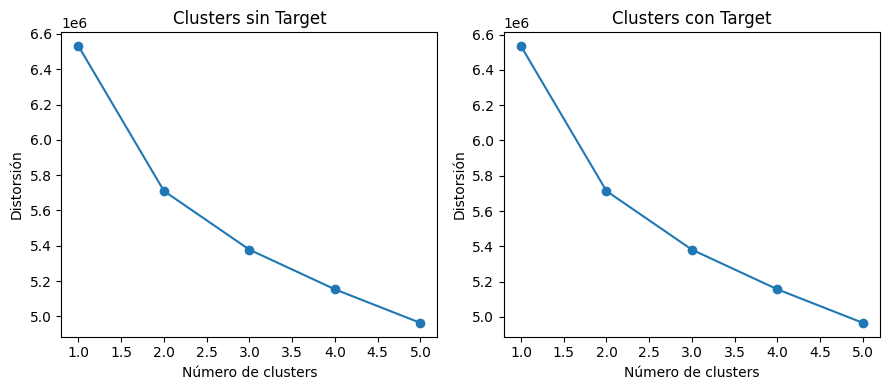

In [89]:
from sklearn.cluster import KMeans

X = df.drop('Target',axis=1)
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(9, 4))
n = 0
for data in [X,df]:
    distortions = []
    for i in range(1, 6):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.subplot(1,2,n+1)
    axs[n].plot(range(1, 6), distortions, marker='o',linestyle='-')
    if data is X:
        axs[n].set_title('Clusters sin Target')
    else:
        axs[n].set_title('Clusters con Target')
    axs[n].set(xlabel = 'Número de clusters', ylabel = 'Distorsión')
    plt.tight_layout()
    plt.grid(False)
    n+=1
plt.show()

In [90]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

inercia = km.inertia_

print(f'Inercia del modelo: {inercia}')
silhouette_km = silhouette_score(X, y_km)
print(f'Índice de silueta: {silhouette_km}')
ch_score_km = calinski_harabasz_score(X, y_km)
print(f'Score de Calinski-Harabasz: {ch_score_km}')

Inercia del modelo: 5377585.429915655
Índice de silueta: 0.08447202142463762
Score de Calinski-Harabasz: 473.9761078322104


In [91]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings(action='ignore', category=UserWarning)


sc = StandardScaler()
sc.fit(X)

X_scaled = sc.transform(X)

modelo_hclust_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = None,
                            n_clusters         = 3
                        )
modelo_hclust_complete.fit(X=X_scaled)

modelo_hclust_average = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = None,
                            n_clusters         = 3
                        )
modelo_hclust_average.fit(X=X_scaled)

modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = None,
                            n_clusters         = 3
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [93]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd


silhouette_complete = silhouette_score(X_scaled, modelo_hclust_complete.labels_)
silhouette_average = silhouette_score(X_scaled, modelo_hclust_average.labels_)
silhouette_ward = silhouette_score(X_scaled, modelo_hclust_ward.labels_)

ch_score_complete = calinski_harabasz_score(X_scaled, modelo_hclust_complete.labels_)
ch_score_average = calinski_harabasz_score(X_scaled, modelo_hclust_average.labels_)
ch_score_ward = calinski_harabasz_score(X_scaled, modelo_hclust_ward.labels_)


df1 = pd.DataFrame({
    'Model': ['Complete', 'Average', 'Ward', 'KMeans'],
    'Silhouette Score': [silhouette_complete, silhouette_average, silhouette_ward, silhouette_km],
    'Calinski-Harabasz Score': [ch_score_complete, ch_score_average, ch_score_ward, ch_score_km],
    'Inertia': [None, None, None, inercia]  # Inertia is only applicable for KMeans
})

df1

,Model,Silhouette Score,Calinski-Harabasz Score,Inertia
0,Complete,0.262747,235.747332,NaN
1,Average,0.571479,30.088440,NaN
2,Ward,0.130080,334.745657,NaN
3,KMeans,0.084472,473.976108,5.377585e+06


**Conclusiones**

In [94]:
import numpy as np
import pandas as pd

# Calcula la desviación estándar de cada lista


df2 = pd.DataFrame({
    'algorithm': ['Penalización', 'Regresion logistica', 'SVM', "Random Forest","Naive Bayes", "KNN", "LDA", "Bagging", "AdaBoost"],
    'Accuracy': [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy8, accuracy9],
    'precision': [precision, precision1, precision2, precision3, precision4, precision5, precision6, precision8, precision9],
    'recall': [recall, recall1, recall2, recall3, recall4, recall5, recall6, recall8, recall9],
    'F1': [f1, f1_1, f1_2, f1_3, f1_4, f1_5, f1_6,f1_8, f1_9],
    'Validacion_cruzada': [valicruz, valicruz1, valicruz2, valicruz3, valicruz4, valicruz5, valicruz6, valicruz8, valicruz9]
})


df2['overall'] = df2.apply(lambda row: (row.precision + row.recall + row.Accuracy + row.F1 + row.Validacion_cruzada) / 5, axis=1)


df2 = df2.sort_values(['overall'], ascending=False)


df2

,algorithm,Accuracy,precision,recall,F1,Validacion_cruzada,overall
7,Bagging,0.746235,0.768255,0.724299,0.754468,0.701887,0.739029
6,LDA,0.648343,0.745567,0.691589,0.679492,0.759361,0.704870
8,AdaBoost,0.579819,0.595851,0.794393,0.572713,0.455416,0.599638
3,Random Forest,0.345633,0.417929,0.556075,0.341741,0.631485,0.458573
0,Penalización,0.341114,0.396883,0.518692,0.344671,0.641213,0.448515
2,SVM,0.435994,0.415958,0.436916,0.419779,0.391945,0.420118
1,Regresion logistica,0.322289,0.103870,0.717290,0.157107,0.701468,0.400405
4,Naive Bayes,0.383283,0.434985,0.322430,0.399041,0.377868,0.383521
5,KNN,0.502259,0.252264,0.478972,0.335846,0.343350,0.382538


Bagging es claramente el mejor modelo en términos de rendimiento general, seguido por LDA. Los demás modelos tienen rendimientos significativamente menores, con AdaBoost teniendo un recall alto pero pobre rendimiento general.





